Gen 0: Best cost = 18
Gen 1: Best cost = 9
Gen 2: Best cost = 8
Gen 3: Best cost = 8
Gen 4: Best cost = 7
Gen 5: Best cost = 6
Gen 6: Best cost = 6
Gen 7: Best cost = 6
Gen 8: Best cost = 6
Gen 9: Best cost = 6
Gen 10: Best cost = 6
Gen 11: Best cost = 6
Gen 12: Best cost = 6
Gen 13: Best cost = 6
Gen 14: Best cost = 6
Gen 15: Best cost = 6
Gen 16: Best cost = 6
Gen 17: Best cost = 6
Gen 18: Best cost = 6
Gen 19: Best cost = 6
Gen 20: Best cost = 6
Gen 21: Best cost = 6
Gen 22: Best cost = 6
Gen 23: Best cost = 6
Gen 24: Best cost = 6
Gen 25: Best cost = 6
Gen 26: Best cost = 6
Gen 27: Best cost = 6
Gen 28: Best cost = 6
Gen 29: Best cost = 6
Gen 30: Best cost = 6
Gen 31: Best cost = 6
Gen 32: Best cost = 6
Gen 33: Best cost = 6
Gen 34: Best cost = 6
Gen 35: Best cost = 6
Gen 36: Best cost = 6
Gen 37: Best cost = 6
Gen 38: Best cost = 6
Gen 39: Best cost = 6
Gen 40: Best cost = 6
Gen 41: Best cost = 6
Gen 42: Best cost = 6
Gen 43: Best cost = 6
Gen 44: Best cost = 6
Gen 45: Best cost =

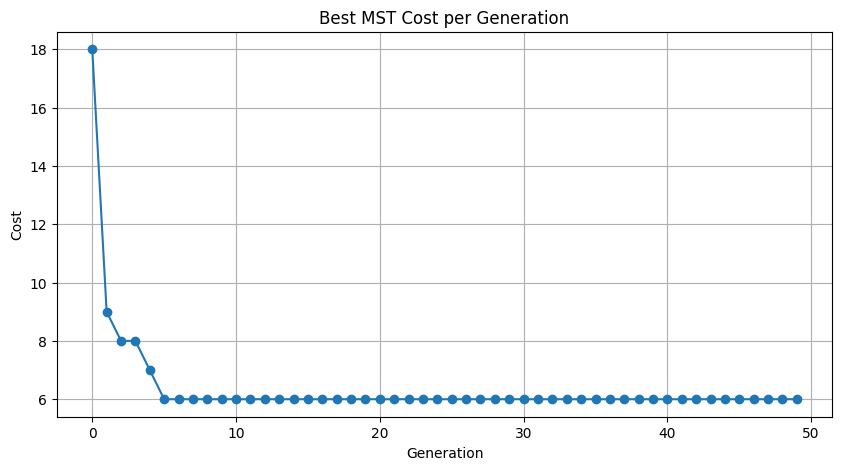

Gen 0: Best cost = 16
Gen 1: Best cost = 8
Gen 2: Best cost = 7
Gen 3: Best cost = 7
Gen 4: Best cost = 7
Gen 5: Best cost = 6
Gen 6: Best cost = 6
Gen 7: Best cost = 6
Gen 8: Best cost = 6
Gen 9: Best cost = 6
Gen 10: Best cost = 6
Gen 11: Best cost = 6
Gen 12: Best cost = 6
Gen 13: Best cost = 6
Gen 14: Best cost = 6
Gen 15: Best cost = 6
Gen 16: Best cost = 6
Gen 17: Best cost = 6
Gen 18: Best cost = 6
Gen 19: Best cost = 6
Gen 20: Best cost = 6
Gen 21: Best cost = 6
Gen 22: Best cost = 6
Gen 23: Best cost = 6
Gen 24: Best cost = 6
Gen 25: Best cost = 6
Gen 26: Best cost = 6
Gen 27: Best cost = 6
Gen 28: Best cost = 6
Gen 29: Best cost = 6
Gen 30: Best cost = 6
Gen 31: Best cost = 6
Gen 32: Best cost = 6
Gen 33: Best cost = 6
Gen 34: Best cost = 6
Gen 35: Best cost = 6
Gen 36: Best cost = 6
Gen 37: Best cost = 6
Gen 38: Best cost = 6
Gen 39: Best cost = 6
Gen 40: Best cost = 6
Gen 41: Best cost = 6
Gen 42: Best cost = 6
Gen 43: Best cost = 6
Gen 44: Best cost = 6
Gen 45: Best cost =

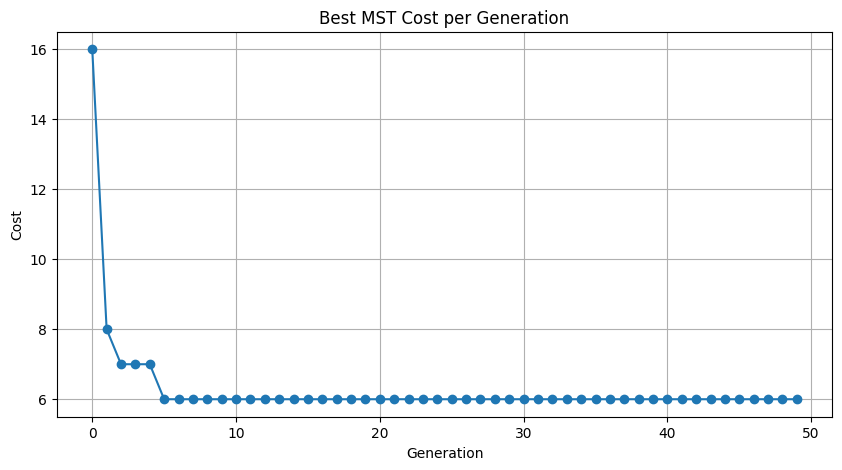

In [1]:

import random
import matplotlib.pyplot as plt

# ----------------------import random
import matplotlib.pyplot as plt

# -----------------------
# Graph and Utilities
# -----------------------

def generate_complete_graph(num_nodes, min_weight=1, max_weight=10):
    edges = []
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            weight = random.randint(min_weight, max_weight)
            edges.append((i, j, weight))
    return edges

class DSU:
    def __init__(self, n):
        self.parent = list(range(n))

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        xr, yr = self.find(x), self.find(y)
        if xr == yr:
            return False
        self.parent[yr] = xr
        return True

def is_valid_tree(edges, num_nodes):
    if len(edges) != num_nodes - 1:
        return False
    dsu = DSU(num_nodes)
    for u, v, _ in edges:
        if not dsu.union(u, v):
            return False
    return True

def total_cost(edges):
    return sum(w for _, _, w in edges)

def kruskal_mst(edges, num_nodes):
    dsu = DSU(num_nodes)
    mst = []
    for u, v, w in sorted(edges, key=lambda e: e[2]):
        if dsu.union(u, v):
            mst.append((u, v, w))
        if len(mst) == num_nodes - 1:
            break
    return mst

# -----------------------
# EA Components
# -----------------------

def random_tree(all_edges, num_nodes):
    random.shuffle(all_edges)
    return repair_edges(all_edges, num_nodes)

def fitness(tree, num_nodes):
    if not is_valid_tree(tree, num_nodes):
        return 0
    return 1 / total_cost(tree)

def crossover(tree1, tree2, num_nodes):
    combined = list(set(tree1 + tree2))
    random.shuffle(combined)
    return repair_edges(combined, num_nodes)

def mutate(tree, all_edges, num_nodes, mutation_rate=0.2):
    new_tree = tree[:]
    for _ in range(int(mutation_rate * len(tree))):
        idx = random.randint(0, len(new_tree) - 1)
        new_edge = random.choice(all_edges)
        new_tree[idx] = new_edge
    return repair_edges(new_tree, num_nodes)

def repair_edges(edges, num_nodes):
    dsu = DSU(num_nodes)
    repaired = []

    # Add noise to help randomness
    edges_with_noise = [(u, v, w + random.uniform(0, 1)) for (u, v, w) in edges]
    edges_with_noise.sort(key=lambda e: e[2])

    for u, v, w in edges_with_noise:
        if dsu.union(u, v):
            repaired.append((u, v, int(w)))
        if len(repaired) == num_nodes - 1:
            break

    if not is_valid_tree(repaired, num_nodes):
        return kruskal_mst(generate_complete_graph(num_nodes), num_nodes)

    return repaired

# -----------------------
# EA Loop
# -----------------------

def evolutionary_mst(num_nodes, generations=100, pop_size=30):
    all_edges = generate_complete_graph(num_nodes)
    population = [random_tree(all_edges, num_nodes) for _ in range(pop_size)]
    best_costs = []

    for gen in range(generations):
        fitnesses = [fitness(ind, num_nodes) for ind in population]
        best_idx = fitnesses.index(max(fitnesses))
        best_tree = population[best_idx]
        best_cost = total_cost(best_tree)
        best_costs.append(best_cost)

        print(f"Gen {gen}: Best cost = {best_cost}")

        # Selection + Crossover + Mutation
        new_population = []
        while len(new_population) < pop_size:
            a, b, c = random.sample(population, 3)
            parent1 = max([a, b, c], key=lambda x: fitness(x, num_nodes))
            parent2 = random.choice(population)
            child = crossover(parent1, parent2, num_nodes)
            child = mutate(child, all_edges, num_nodes)
            new_population.append(child)

        # Elitism
        new_population[0] = best_tree
        population = new_population

    # Final Output
    print("\nFinal Best MST:")
    for u, v, w in best_tree:
        print(f"{u} - {v} (weight {w})")
    print(f"Total cost: {best_cost}")

    return best_costs

# -----------------------
# Run & Plot
# -----------------------

best_costs = evolutionary_mst(num_nodes=7, generations=50, pop_size=40)

plt.figure(figsize=(10, 5))
plt.plot(best_costs, marker='o')
plt.title("Best MST Cost per Generation")
plt.xlabel("Generation")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

# Graph and Utilities
# -----------------------

def generate_complete_graph(num_nodes, min_weight=1, max_weight=10):
    edges = []
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            weight = random.randint(min_weight, max_weight)
            edges.append((i, j, weight))
    return edges

class DSU:
    def __init__(self, n):
        self.parent = list(range(n))

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        xr, yr = self.find(x), self.find(y)
        if xr == yr:
            return False
        self.parent[yr] = xr
        return True

def is_valid_tree(edges, num_nodes):
    if len(edges) != num_nodes - 1:
        return False
    dsu = DSU(num_nodes)
    for u, v, _ in edges:
        if not dsu.union(u, v):
            return False
    return True

def total_cost(edges):
    return sum(w for _, _, w in edges)

def kruskal_mst(edges, num_nodes):
    dsu = DSU(num_nodes)
    mst = []
    for u, v, w in sorted(edges, key=lambda e: e[2]):
        if dsu.union(u, v):
            mst.append((u, v, w))
        if len(mst) == num_nodes - 1:
            break
    return mst

# -----------------------
# EA Components
# -----------------------

def random_tree(all_edges, num_nodes):
    random.shuffle(all_edges)
    return repair_edges(all_edges, num_nodes)

def fitness(tree, num_nodes):
    if not is_valid_tree(tree, num_nodes):
        return 0
    return 1 / total_cost(tree)

def crossover(tree1, tree2, num_nodes):
    combined = list(set(tree1 + tree2))
    random.shuffle(combined)
    return repair_edges(combined, num_nodes)

def mutate(tree, all_edges, num_nodes, mutation_rate=0.2):
    new_tree = tree[:]
    for _ in range(int(mutation_rate * len(tree))):
        idx = random.randint(0, len(new_tree) - 1)
        new_edge = random.choice(all_edges)
        new_tree[idx] = new_edge
    return repair_edges(new_tree, num_nodes)

def repair_edges(edges, num_nodes):
    dsu = DSU(num_nodes)
    repaired = []

    # Add noise to help randomness
    edges_with_noise = [(u, v, w + random.uniform(0, 1)) for (u, v, w) in edges]
    edges_with_noise.sort(key=lambda e: e[2])

    for u, v, w in edges_with_noise:
        if dsu.union(u, v):
            repaired.append((u, v, int(w)))
        if len(repaired) == num_nodes - 1:
            break

    if not is_valid_tree(repaired, num_nodes):
        return kruskal_mst(generate_complete_graph(num_nodes), num_nodes)

    return repaired

# -----------------------
# EA Loop
# -----------------------

def evolutionary_mst(num_nodes, generations=100, pop_size=30):
    all_edges = generate_complete_graph(num_nodes)
    population = [random_tree(all_edges, num_nodes) for _ in range(pop_size)]
    best_costs = []

    for gen in range(generations):
        fitnesses = [fitness(ind, num_nodes) for ind in population]
        best_idx = fitnesses.index(max(fitnesses))
        best_tree = population[best_idx]
        best_cost = total_cost(best_tree)
        best_costs.append(best_cost)

        print(f"Gen {gen}: Best cost = {best_cost}")

        # Selection + Crossover + Mutation
        new_population = []
        while len(new_population) < pop_size:
            a, b, c = random.sample(population, 3)
            parent1 = max([a, b, c], key=lambda x: fitness(x, num_nodes))
            parent2 = random.choice(population)
            child = crossover(parent1, parent2, num_nodes)
            child = mutate(child, all_edges, num_nodes)
            new_population.append(child)

        # Elitism
        new_population[0] = best_tree
        population = new_population

    # Final Output
    print("\nFinal Best MST:")
    for u, v, w in best_tree:
        print(f"{u} - {v} (weight {w})")
    print(f"Total cost: {best_cost}")

    return best_costs

# -----------------------
# Run & Plot
# -----------------------

best_costs = evolutionary_mst(num_nodes=7, generations=50, pop_size=40)

plt.figure(figsize=(10, 5))
plt.plot(best_costs, marker='o')
plt.title("Best MST Cost per Generation")
plt.xlabel("Generation")
plt.ylabel("Cost")
plt.grid(True)
plt.show()